In [1]:
# ========================================
# CELL 1: Import libraries and create synthetic data
# ========================================
import numpy as np  # [1] NumPy for numerical computing and array operations
import matplotlib.pyplot as plt  # [2] Matplotlib for data visualization and plotting

def create_sample_digits():
    """Create simple synthetic 0s and 1s for learning"""
    np.random.seed(42)  # [3] Set random seed for reproducible results
    
    # Create synthetic 0s (circles/ovals)
    zeros_images = []
    for _ in range(1000):  # [4] Generate 1000 synthetic zeros
        img = np.zeros((28, 28))  # [5] Create blank 28x28 image (MNIST standard size)
        # Draw a circle/oval
        center_x, center_y = 14 + np.random.randint(-3, 4), 14 + np.random.randint(-3, 4)  # [6] Random center position
        radius = np.random.randint(6, 10)  # [7] Random radius for variation
        
        for i in range(28):
            for j in range(28):
                dist = np.sqrt((i - center_x)**2 + (j - center_y)**2)  # [8] Calculate distance from center
                if abs(dist - radius) < 2:  # [9] Draw pixels near the radius (circle edge)
                    img[i, j] = np.random.randint(180, 255)  # [10] White/gray pixels for digit
        
        # Add some noise
        noise = np.random.normal(0, 10, (28, 28))  # [11] Gaussian noise for realism
        img = np.clip(img + noise, 0, 255)  # [12] Add noise and clamp to valid pixel range
        zeros_images.append(img)
    
    # Create synthetic 1s (vertical lines)
    ones_images = []
    for _ in range(1000):  # [13] Generate 1000 synthetic ones
        img = np.zeros((28, 28))
        # Draw a vertical line
        center_x = 14 + np.random.randint(-2, 3)  # [14] Slight horizontal variation
        width = np.random.randint(2, 4)  # [15] Random line thickness
        
        for i in range(5, 23):  # [16] Vertical span for the digit 1
            for j in range(max(0, center_x - width//2), min(28, center_x + width//2 + 1)):
                img[i, j] = np.random.randint(180, 255)
        
        # Add some noise
        noise = np.random.normal(0, 10, (28, 28))
        img = np.clip(img + noise, 0, 255)
        ones_images.append(img)
    
    # Combine data
    all_images = np.array(zeros_images + ones_images).astype(np.uint8)  # [17] Combine into single array
    all_labels = np.array([0] * 1000 + [1] * 1000)  # [18] Create corresponding labels
    
    # Shuffle
    indices = np.random.permutation(len(all_images))  # [19] Random shuffle to prevent ordering bias
    all_images = all_images[indices]
    all_labels = all_labels[indices]
    
    # Split into train/test
    split = 1600  # [20] 80/20 train/test split (1600 train, 400 test)
    train_images = all_images[:split]
    train_labels = all_labels[:split]
    test_images = all_images[split:]
    test_labels = all_labels[split:]
    
    return train_images, train_labels, test_images, test_labels

print("Creating synthetic digit data...")
train_images_binary, train_labels_binary, test_images_binary, test_labels_binary = create_sample_digits()

print(f"Created {len(train_images_binary)} training images")
print(f"Created {len(test_images_binary)} test images")
print(f"Training 0s: {np.sum(train_labels_binary == 0)}, 1s: {np.sum(train_labels_binary == 1)}")
print("Data creation complete!")


Creating synthetic digit data...
Created 1600 training images
Created 400 test images
Training 0s: 805, 1s: 795
Data creation complete!


In [2]:
# ========================================
# CELL 2: Verify data shapes
# ========================================
print("Data Summary:")
print(f"Training images shape: {train_images_binary.shape}")
print(f"Training labels shape: {train_labels_binary.shape}")
print(f"Test images shape: {test_images_binary.shape}") 
print(f"Test labels shape: {test_labels_binary.shape}")
print(f"Test 0s: {np.sum(test_labels_binary == 0)}, 1s: {np.sum(test_labels_binary == 1)}")


Data Summary:
Training images shape: (1600, 28, 28)
Training labels shape: (1600,)
Test images shape: (400, 28, 28)
Test labels shape: (400,)
Test 0s: 195, 1s: 205


Sample training images:


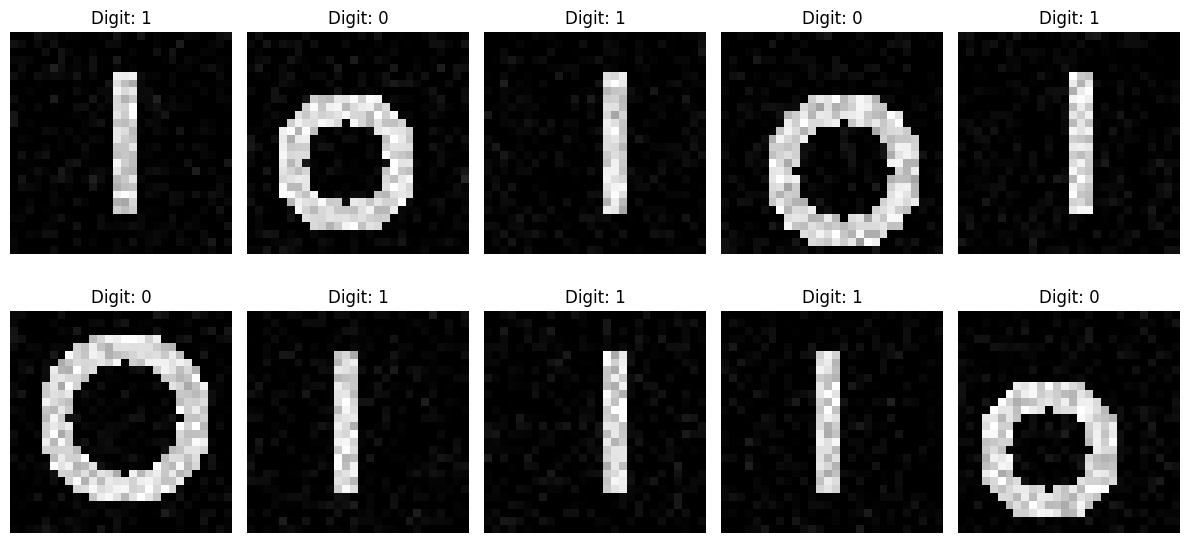

In [3]:
# ========================================
# CELL 3: Visualize sample digits
# ========================================
def plot_binary_samples(images, labels, num_samples=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        digit = '0' if labels[i] == 0 else '1'
        plt.title(f'Digit: {digit}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample training images:")
plot_binary_samples(train_images_binary, train_labels_binary)


In [10]:
# ========================================
# CELL 4: Preprocess data for neural network
# ========================================
def preprocess_binary_data(images, labels):
    # Flatten images to 784 pixels
    X = images.reshape(images.shape[0], -1)  # [21] Flatten 28x28 images to 784-element vectors
    # Normalize to 0-1 range
    X = X.astype(np.float32) / 255.0  # [22] Normalize pixel values from 0-255 to 0-1 range
    # Labels are already 0 or 1
    y = labels.reshape(-1, 1)  # [23] Reshape labels to column vector for matrix operations
    return X, y

X_train, y_train = preprocess_binary_data(train_images_binary, train_labels_binary)
X_test, y_test = preprocess_binary_data(test_images_binary, test_labels_binary)

print(f"Preprocessed training data shape: {X_train.shape}")
print(f"Preprocessed training labels shape: {y_train.shape}")
print(f"Pixel value range: {X_train.min():.3f} to {X_train.max():.3f}")


Preprocessed training data shape: (1600, 784)
Preprocessed training labels shape: (1600, 1)
Pixel value range: 0.000 to 1.000


In [11]:
# ========================================
# CELL 5: Create the Binary Neural Network
# ========================================
class BinaryNeuralNetwork:
    def __init__(self, input_size=784, hidden_size=64):
        # Smaller network for binary classification
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # [24] Input to hidden weights (small random values)
        self.b1 = np.zeros((1, hidden_size))  # [25] Hidden layer biases (start at zero)
        self.W2 = np.random.randn(hidden_size, 1) * 0.01  # [26] Hidden to output weights
        self.b2 = np.zeros((1, 1))  # [27] Output bias
        
    def sigmoid(self, x):
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)  # [28] Prevent numerical overflow in exponential
        return 1 / (1 + np.exp(-x))  # [29] Sigmoid activation: maps any real number to (0,1)
    
    def relu(self, x):
        return np.maximum(0, x)  # [30] ReLU activation: max(0, x) - simple and effective
    
    def forward(self, X):
        # Hidden layer with ReLU
        self.z1 = np.dot(X, self.W1) + self.b1  # [31] Linear transformation: X*W + b
        self.a1 = self.relu(self.z1)  # [32] Apply ReLU activation
        
        # Output layer with sigmoid (for binary classification)
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # [33] Hidden to output transformation
        self.a2 = self.sigmoid(self.z2)  # [34] Sigmoid gives probability between 0 and 1
        
        return self.a2
    
    def compute_loss(self, y_pred, y_true):
        # Binary cross-entropy loss
        # Clip predictions to avoid log(0)
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)  # [35] Prevent log(0) which would be undefined
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  # [36] Binary cross-entropy formula
        return loss
    
    def backward(self, X, y_true, learning_rate=0.01):
        m = X.shape[0]  # [37] Number of training samples
        
        # Output layer gradients
        dz2 = self.a2 - y_true  # [38] Gradient of loss w.r.t. output (derivative of sigmoid + cross-entropy)
        dW2 = (1/m) * np.dot(self.a1.T, dz2)  # [39] Gradient w.r.t. output weights
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)  # [40] Gradient w.r.t. output bias
        
        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)  # [41] Backpropagate error to hidden layer
        dz1 = da1 * (self.z1 > 0)  # [42] ReLU derivative: 1 if input > 0, else 0
        dW1 = (1/m) * np.dot(X.T, dz1)  # [43] Gradient w.r.t. hidden weights
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)  # [44] Gradient w.r.t. hidden bias
        
        # Update weights
        self.W2 -= learning_rate * dW2  # [45] Update output weights using gradient descent
        self.b2 -= learning_rate * db2  # [46] Update output bias
        self.W1 -= learning_rate * dW1  # [47] Update hidden weights
        self.b1 -= learning_rate * db1  # [48] Update hidden bias
    
    def predict(self, X):
        predictions = self.forward(X)  # [49] Get network output probabilities
        return (predictions > 0.5).astype(int)  # [50] Convert probabilities to binary predictions
    
    def accuracy(self, X, y):
        predictions = self.predict(X)  # [51] Get binary predictions
        return np.mean(predictions == y)  # [52] Calculate fraction of correct predictions

# Create the network
nn = BinaryNeuralNetwork()
print("Binary neural network created!")
print(f"Input layer size: 784")
print(f"Hidden layer size: 64")
print(f"Output layer size: 1")

# Test forward pass
sample_pred = nn.forward(X_train[:5])
print(f"\nTest predictions shape: {sample_pred.shape}")
print(f"Sample predictions: {sample_pred.flatten()}")
print(f"Actual labels: {y_train[:5].flatten()}")


Binary neural network created!
Input layer size: 784
Hidden layer size: 64
Output layer size: 1

Test predictions shape: (5, 1)
Sample predictions: [0.50050964 0.50190305 0.50025784 0.50199361 0.50105566]
Actual labels: [1 0 1 0 1]


In [12]:
# ========================================
# CELL 6: Training function
# ========================================
def train_network(nn, X_train, y_train, X_test, y_test, epochs=100, learning_rate=0.1):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(epochs):  # [53] Loop through specified number of epochs
        # Forward pass
        predictions = nn.forward(X_train)  # [54] Get predictions for all training data
        
        # Compute loss
        loss = nn.compute_loss(predictions, y_train)  # [55] Calculate how wrong predictions are
        
        # Backward pass
        nn.backward(X_train, y_train, learning_rate)  # [56] Update weights based on errors
        
        # Track metrics
        train_acc = nn.accuracy(X_train, y_train)  # [57] Measure training performance
        test_acc = nn.accuracy(X_test, y_test)  # [58] Measure generalization to new data
        
        train_losses.append(loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        
        if epoch % 10 == 0:  # [59] Print progress every 10 epochs
            print(f"Epoch {epoch}: Loss={loss:.4f}, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")
    
    return train_losses, train_accuracies, test_accuracies

print("Training function ready!")


Training function ready!


In [13]:
# ========================================
# CELL 7: Train the network
# ========================================
print("Starting training...")
print("This will take about 30 seconds...")

losses, train_accs, test_accs = train_network(nn, X_train, y_train, X_test, y_test, epochs=100)  # [60] Execute training for 100 epochs

print(f"\n🎉 Training Complete!")
print(f"Final Training Accuracy: {train_accs[-1]:.4f} ({train_accs[-1]*100:.1f}%)")
print(f"Final Test Accuracy: {test_accs[-1]:.4f} ({test_accs[-1]*100:.1f}%)")


Starting training...
This will take about 30 seconds...
Epoch 0: Loss=0.6940, Train Acc=0.6681, Test Acc=0.6125
Epoch 10: Loss=0.6631, Train Acc=0.8119, Test Acc=0.7625
Epoch 20: Loss=0.4608, Train Acc=1.0000, Test Acc=1.0000
Epoch 30: Loss=0.2662, Train Acc=1.0000, Test Acc=1.0000
Epoch 40: Loss=0.1348, Train Acc=1.0000, Test Acc=1.0000
Epoch 50: Loss=0.0731, Train Acc=1.0000, Test Acc=1.0000
Epoch 60: Loss=0.0466, Train Acc=1.0000, Test Acc=1.0000
Epoch 70: Loss=0.0330, Train Acc=1.0000, Test Acc=1.0000
Epoch 80: Loss=0.0251, Train Acc=1.0000, Test Acc=1.0000
Epoch 90: Loss=0.0199, Train Acc=1.0000, Test Acc=1.0000

🎉 Training Complete!
Final Training Accuracy: 1.0000 (100.0%)
Final Test Accuracy: 1.0000 (100.0%)


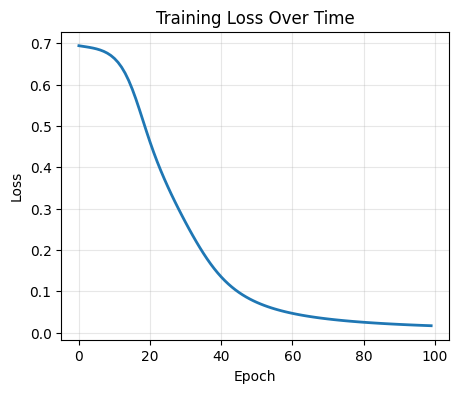

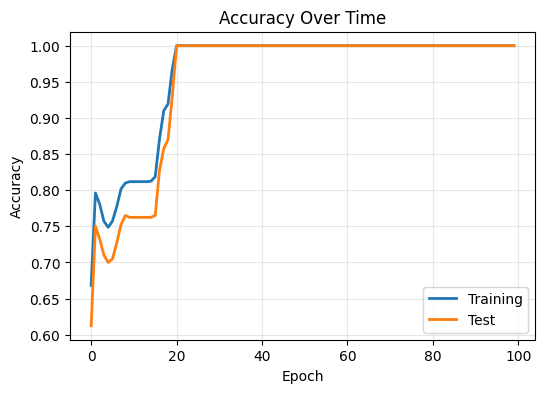

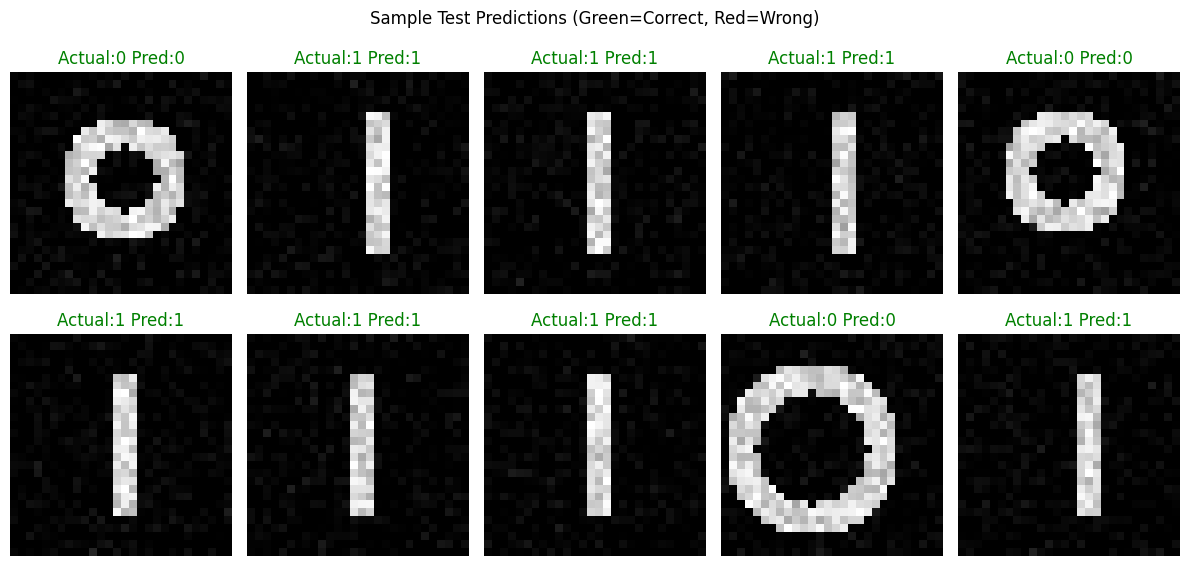

In [14]:
# ========================================
# CELL 8: Visualize training progress (FIXED VERSION)
# ========================================
plt.close('all')  # [61] Close any existing plots to prevent overlap

# Figure 1: Training Loss
plt.figure(figsize=(5, 4))
plt.plot(losses, linewidth=2)  # [62] Plot loss decrease over epochs
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Figure 2: Accuracy
plt.figure(figsize=(6, 4))
plt.plot(train_accs, label='Training', linewidth=2)  # [63] Training accuracy curve
plt.plot(test_accs, label='Test', linewidth=2)  # [64] Test accuracy curve for generalization check
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Figure 3: Sample Predictions
plt.figure(figsize=(12, 6))
test_preds = nn.predict(X_test[:10])  # [65] Get predictions for first 10 test images
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images_binary[i], cmap='gray')  # [66] Display original test image
    actual = test_labels_binary[i]
    predicted = test_preds[i][0]
    color = 'green' if actual == predicted else 'red'  # [67] Color-code correct vs incorrect
    plt.title(f'Actual:{actual} Pred:{predicted}', color=color)
    plt.axis('off')
plt.suptitle('Sample Test Predictions (Green=Correct, Red=Wrong)')
plt.tight_layout()
plt.show()


Testing individual images:

--- Testing image 0 ---


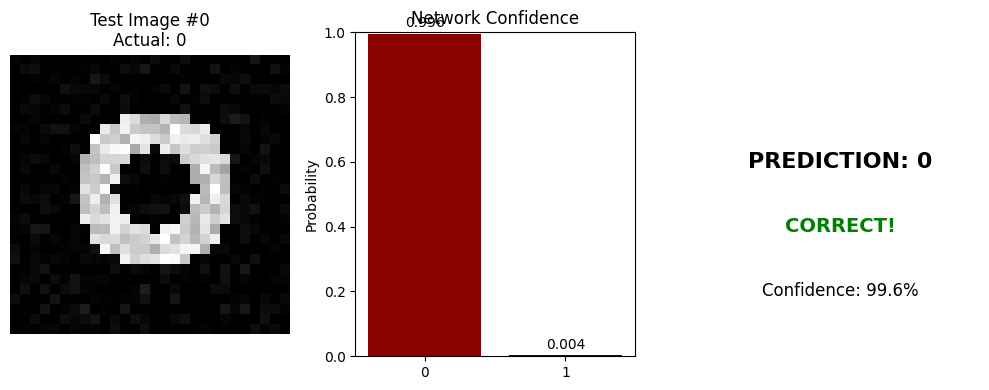


--- Testing image 5 ---


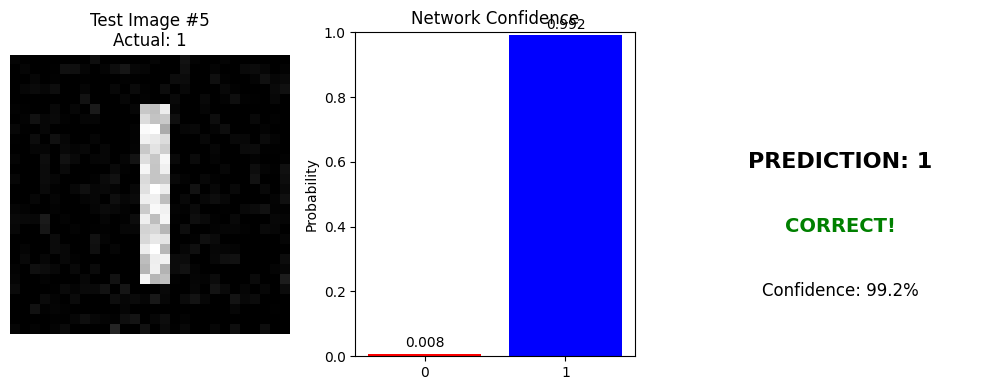


--- Testing image 10 ---


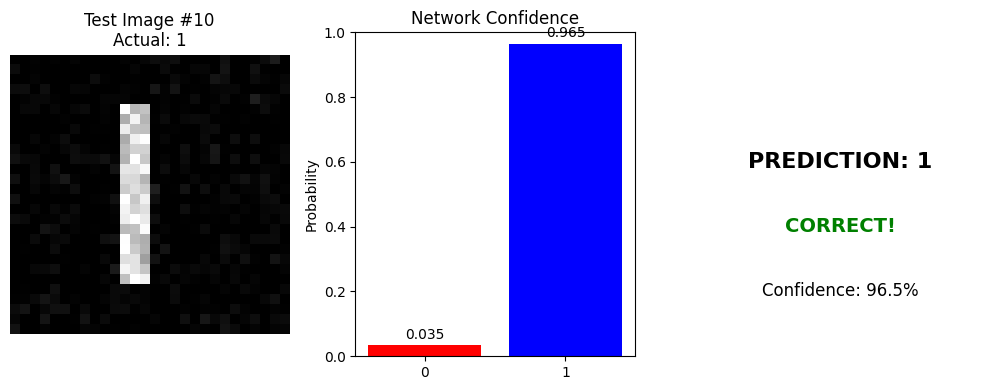

In [15]:
# ========================================
# CELL 9: Test individual images with confidence
# ========================================
def test_single_digit(nn, image_index):
    """Test the network on a single image with detailed output"""
    image = test_images_binary[image_index]
    actual_label = test_labels_binary[image_index]
    
    # Preprocess the single image
    X_single = image.reshape(1, -1).astype(np.float32) / 255.0  # [68] Same preprocessing as training
    
    # Make prediction
    prediction_prob = nn.forward(X_single)[0][0]  # [69] Get probability output from network
    prediction = 1 if prediction_prob > 0.5 else 0  # [70] Convert probability to binary decision
    
    # Display
    plt.figure(figsize=(10, 4))
    
    # Show original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Test Image #{image_index}\nActual: {actual_label}')
    plt.axis('off')
    
    # Show confidence bars
    plt.subplot(1, 3, 2)
    bars = plt.bar(['0', '1'], [1-prediction_prob, prediction_prob],  # [71] Visualize confidence for each class
                   color=['red' if prediction_prob > 0.5 else 'darkred', 
                          'blue' if prediction_prob > 0.5 else 'darkblue'])
    plt.title(f'Network Confidence')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    
    # Add confidence text
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')  # [72] Display exact probability values
    
    # Show result
    plt.subplot(1, 3, 3)
    result_color = 'green' if prediction == actual_label else 'red'
    result_text = 'CORRECT!' if prediction == actual_label else 'WRONG!'
    
    plt.text(0.5, 0.6, f'PREDICTION: {prediction}', ha='center', va='center', 
             fontsize=16, weight='bold')
    plt.text(0.5, 0.4, result_text, ha='center', va='center', 
             fontsize=14, color=result_color, weight='bold')
    plt.text(0.5, 0.2, f'Confidence: {max(prediction_prob, 1-prediction_prob):.1%}',  # [73] Show highest confidence percentage
             ha='center', va='center', fontsize=12)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return prediction == actual_label
    return prediction == actual_label

# Test a few individual images
print("Testing individual images:")
for i in [0, 5, 10]:
    print(f"\n--- Testing image {i} ---")
    correct = test_single_digit(nn, i)


In [16]:
# ========================================
# CELL 10: Custom image testing setup
# ========================================
# Install PIL if needed (uncomment the line below if you get import errors)
# !pip install Pillow

try:
    from PIL import Image  # [74] Python Imaging Library for loading various image formats
    import os
    import glob  # [75] For finding files with wildcard patterns
    print("PIL imported successfully! You can now test custom images.")
    
    def preprocess_custom_images(images):
        """Preprocess custom images for the neural network"""
        processed_images = []
        
        for img in images:
            # Ensure it's 28x28
            if img.shape != (28, 28):  # [76] Resize if not standard MNIST size
                img_pil = Image.fromarray(img)
                img_pil = img_pil.resize((28, 28))  # [77] Resize to match training data
                img = np.array(img_pil)
            
            # Flatten and normalize
            img_flat = img.reshape(1, -1).astype(np.float32) / 255.0  # [78] Same preprocessing as training
            processed_images.append(img_flat)
        
        return np.vstack(processed_images)  # [79] Stack into batch format

    def load_custom_images_from_folder(folder_path):
        """Load images from a folder on your computer"""
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']  # [80] Supported image formats
        image_paths = []
        
        for extension in image_extensions:
            image_paths.extend(glob.glob(os.path.join(folder_path, extension)))
            image_paths.extend(glob.glob(os.path.join(folder_path, extension.upper())))  # [81] Handle uppercase extensions
        
        custom_images = []
        image_names = []
        
        for img_path in image_paths:
            try:
                # Load and preprocess image
                img = Image.open(img_path)  # [82] Load image file
                img = img.convert('L')  # [83] Convert to grayscale (L = luminance)
                img = img.resize((28, 28))  # [84] Resize to MNIST standard
                img_array = np.array(img)
                
                # Invert if needed (MNIST has white digits on black background)
                if np.mean(img_array) > 127:  # [85] Auto-detect if background is light
                    img_array = 255 - img_array  # [86] Invert to match MNIST convention
                
                custom_images.append(img_array)
                image_names.append(os.path.basename(img_path))
                print(f"Loaded: {os.path.basename(img_path)}")
                
            except Exception as e:
                print(f"Could not load {img_path}: {e}")  # [87] Handle corrupted/unsupported files
        
        return np.array(custom_images), image_names

    def test_custom_images(nn, custom_images, image_names):
        """Test the neural network on your custom images"""
        # Preprocess the images
        X_custom = preprocess_custom_images(custom_images)  # [88] Apply same preprocessing pipeline
        
        # Make predictions
        predictions = nn.forward(X_custom)  # [89] Get probability predictions
        predicted_classes = nn.predict(X_custom)  # [90] Get binary class predictions
        
        # Display results
        num_images = len(custom_images)
        cols = min(5, num_images)  # [91] Arrange in grid layout
        rows = (num_images + cols - 1) // cols  # [92] Calculate needed rows
        
        plt.figure(figsize=(3*cols, 3*rows))
        
        for i in range(num_images):
            plt.subplot(rows, cols, i+1)
            plt.imshow(custom_images[i], cmap='gray')  # [93] Display original image
            
            confidence = predictions[i][0]
            predicted = predicted_classes[i][0]
            
            if predicted == 1:
                result = f"ONE (conf: {confidence:.3f})"
                color = 'blue'
            else:
                result = f"ZERO (conf: {1-confidence:.3f})"  # [94] Show confidence for predicted class
                color = 'red'
                
            plt.title(f"{image_names[i]}\n{result}", color=color)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return predictions, predicted_classes
    
    print("\n🎯 Ready to test custom images!")
    print("\nTo test your own images:")
    print("1. Create a folder with your 0 and 1 images")
    print("2. Run this code:")
    print("   folder_path = '/path/to/your/images'")
    print("   custom_imgs, img_names = load_custom_images_from_folder(folder_path)")
    print("   test_custom_images(nn, custom_imgs, img_names)")
    
except ImportError:
    print("PIL not available. Run: !pip install Pillow")  # [95] Fallback if PIL not installed
    print("Then restart kernel and run this cell again.")


PIL imported successfully! You can now test custom images.

🎯 Ready to test custom images!

To test your own images:
1. Create a folder with your 0 and 1 images
2. Run this code:
   folder_path = '/path/to/your/images'
   custom_imgs, img_names = load_custom_images_from_folder(folder_path)
   test_custom_images(nn, custom_imgs, img_names)


Loaded: 1.1.jpg
Loaded: 0.1.jpg
Loaded: 4.1.jpeg
Loaded: p.1.jpeg
Loaded: 1.2.png
Loaded: 1.3.png
Loaded: 0.2.png
Loaded: 0.3.png
Loaded: 2.1.png


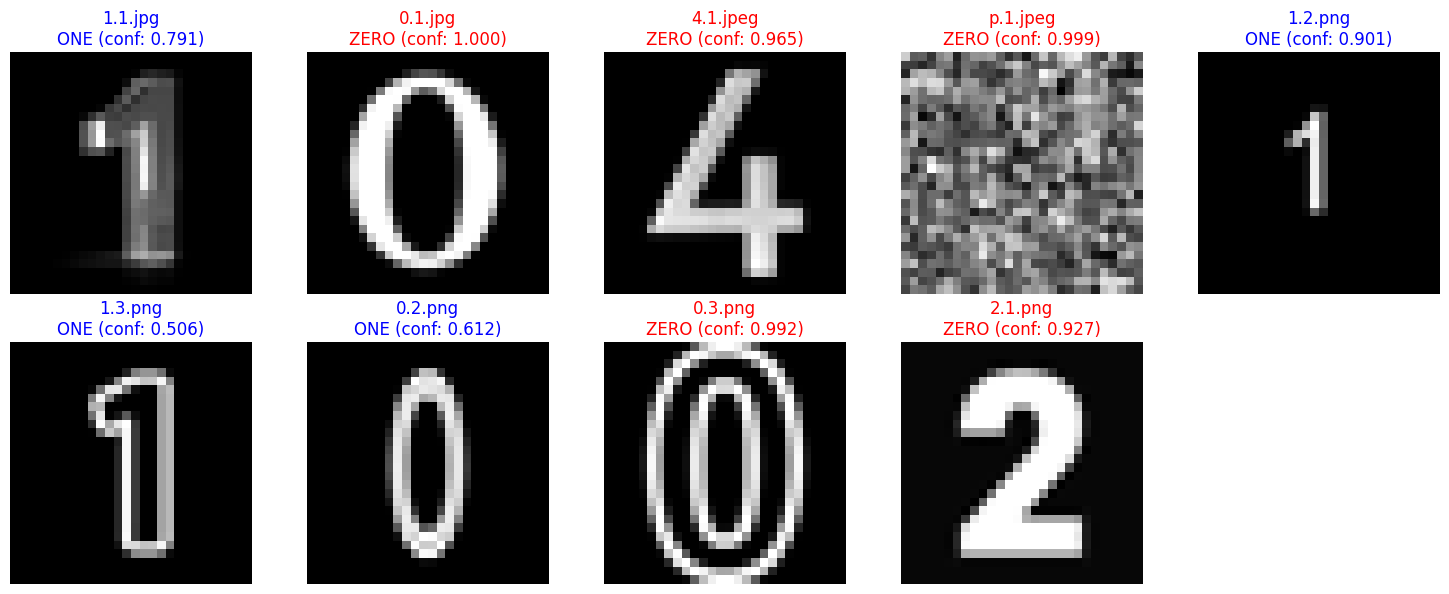

Tested 9 images!


In [18]:
# Replace fodler path to folder with image files
folder_path = "/Users/jacksondavid/Desktop/my_digits"  # Change this!

# Load your images
custom_imgs, img_names = load_custom_images_from_folder(folder_path)

# Test them with your neural network
if len(custom_imgs) > 0:
    predictions, predicted_classes = test_custom_images(nn, custom_imgs, img_names)
    print(f"Tested {len(custom_imgs)} images!")
else:
    print("No images found. Check your folder path.")